# Statistics Task

## 1a.) Probability of correct cancellation predictions

##### 1. NCR =  no cancellation in reality
##### 2. CR =  cancellation in reality
##### 3. MC =  model predicting cancellation 
##### 4. MNC =  model predicting no cancellation 


#### Given;
FPR = 0.04 implies P(MC|NCR) = 0.04
and TNR = 1-FPR = 0.96 implies P(MNC|NCR) = 0.96

FNR = 0  implies P(MNC|CR)= 0 
and TPR = 1-FNR = 1 implies P(MC|CR) = 1

Since 24% of customers always cancel
P(CR) = 0.24
But model has a FPR of 4% hence it will predict 4% more than real cancellations. 
Therefore P(MC) = 24%+4% = 28% = 0.28



#### Question
P(CR|MC) =?

According to Bayes Theorem;
### P(CR|MC) = (P(MC|CR) * P(CR))/P(MC) =(1*0.24)/0.28= 0.85

Verification:
Calculate P(NCR|MNC) and it should be 1 because model has a FNR = 0
According to Bayes theorem again;
P(NCR|MNC) = (P(MNC|NCR) * P(NCR))/P(MNC) = (0.96*0.76)/0.72 = 1


## 1b.) Insurance offer decision

Given;
10€ loss against a premature cancellation and reimbursement of 8,5€ by insurance;

However, it is assumed that 24% of customers always cancel prematurely and hence for every 100 customers, we would incurr loss of 240 € without insurance and 36 € with insurance. Hence 204€ are saved against every 100 customers, so if the corresponding insurance cost is less than the amount saved, then accepting the offer would make sense.  

But when the company relies on the model for demand planning, to make the decision about taking the insurance offer, one needs to know about the probability that a customer will make a cancellation given our model says there wont be a cancellation; i.e.
P(CR|MNC) = ?

Acording to Bayes Theorem

### P(CR|MNC) = P(MNC|CR)*P(CR)/P(MNC) = 0

From demand planning prespective, if we have the knowledge of cancellations beforehand, we can avoid the losses of 10€ against every cancellation. Insurance offer would have been attractive only when the model was not accurate enough in predicting cancellations. 

### However, as can be seen the model has an outstanding performance in predicting true negetives, it seems the offer is not required.


# 2a.) Cohort Analysis

In [550]:
import pandas as pd
import seaborn as sns
import numpy as np
from operator import attrgetter
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [4]:
# installing required packages and cloning the data
!pip install fastparquet
!git clone https://github.com/charlotteveitner/sample_data.git

     |████████████████████████████████| 318 kB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 59 kB 6.4 MB/s  eta 0:00:01
     |████████████████████████████████| 2.3 MB 7.6 MB/s eta 0:00:01
  Created wheel for fastparquet: filename=fastparquet-0.6.3-cp38-cp38-macosx_10_9_x86_64.whl size=479045 sha256=b3a807b894f9e1583bd6b1abec50f46af0c3ab480cb403997b1d9f1a67970d92
  Stored in directory: /Users/lanaguest/Library/Caches/pip/wheels/2f/37/76/8a00afc70bef5ffa31ac1fedca78465288636bd5dd785f9a60
  Created wheel for thrift: filename=thrift-0.13.0-cp38-cp38-macosx_10_9_x86_64.whl size=176341 sha256=3343f6580d3956067bf347e625f0fc408daafbc5f7077ceb5318987cc6ae8002
  Stored in directory: /Users/lanaguest/Library/Caches/pip/wheels/0a/52/7e/8054b57725b8f2b9ddbaacb81b271b939681cc03f8231e6ebc
Successfully built fastparquet thrift


In [551]:
# Load data
data_orders = pd.read_parquet('sample_data/orders_data.parquet', engine = 'fastparquet') 
data_products = pd.read_parquet('sample_data/products_data.parquet', engine = 'fastparquet')

In [552]:
print('Number of customers are {}'.format(data_orders['customer_id'].unique().shape[0]))
print('Number of products are {}'.format(data_products['product_title'].unique().shape[0]))

Number of customers are 152665
Number of products are 56


In [553]:
# Number of datapoints in order data
print(data_orders.shape[0], data_products.shape[0])


189140 58


In [554]:
data_orders.head()

,billing_address_country,billing_address_zip,customer_id,order_number,total_discounts,cancel_reason,processed_at,total_weight,cancelled_at,created_at,product_items,first_date_order
0,Germany,81371,43539353630,1,0,customer,2019-12-03 13:08:32 UTC,0,2019-12-04 09:00:44 UTC,2019-12-03 13:08:33 UTC,Golf_set_with_caddy_shoes_and_50_balls,2019-12-03 13:08:33 UTC
1,Germany,12045,43973434860,2,0,customer,2019-12-04 09:23:09 UTC,0,2020-01-20 14:55:25 UTC,2019-12-04 09:23:09 UTC,Golf_set_with_caddy_shoes_and_50_balls,2019-12-04 09:23:09 UTC
2,Germany,8315,46668580946,3,0,None,2019-12-06 07:58:34 UTC,0,None,2019-12-06 07:58:34 UTC,Golf_set_with_caddy_shoes_and_50_balls,2019-12-06 07:58:34 UTC
3,Germany,91301,40345377076,4,0,None,2019-12-06 18:29:03 UTC,0,None,2019-12-06 18:29:04 UTC,Golf_set_with_caddy_shoes_and_50_balls,2019-12-06 18:29:04 UTC
4,Germany,8577,33355469588,5,0,None,2019-12-08 18:16:40 UTC,0,None,2019-12-08 18:16:40 UTC,Golf_set_with_caddy_shoes_and_50_balls,2019-12-08 18:16:40 UTC


In [555]:
# Unique order numbers
data_orders['order_number'].nunique()

188810

In [581]:
# drop duplicates from both tables
df_orders = data_orders.drop_duplicates()
df_products = data_products.drop_duplicates()
print('{} number of duplicate orders dropped!'.format(data_orders.shape[0]-df_orders.shape[0]))
print('{} number of duplicate products dropped!'.format(data_products.shape[0]-df_products.shape[0]))

277 number of duplicate orders dropped!
2 number of duplicate products dropped!


In [582]:
# Find missing product items from order data
missing_prd = set(df_orders['product_items']) - set(df_products['product_title'])
len(missing_prd)

6673

Since the number of missing product items in orders data is high, it was further investigated and it was found that some purchases have multiple items.

In [558]:
# explode order table based on different products purchased
df_orders = df_orders.assign(product_items=df_orders['product_items'].str.split(',')).explode('product_items')

In [559]:
# Merging the products and data tables
df_products.rename(columns = {'product_title':'product_items'}, inplace = True)
df_orders_merged = df_orders.merge(df_products, on = 'product_items', how = 'left')
df_orders_merged

/Users/lanaguest/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,billing_address_country,billing_address_zip,customer_id,order_number,total_discounts,cancel_reason,processed_at,total_weight,cancelled_at,created_at,product_items,first_date_order,product_type,product_price,product_category
0,Germany,81371,43539353630,1,0,customer,2019-12-03 13:08:32 UTC,0,2019-12-04 09:00:44 UTC,2019-12-03 13:08:33 UTC,Golf_set_with_caddy_shoes_and_50_balls,2019-12-03 13:08:33 UTC,mixed_set_golf,259.99,golf
1,Germany,12045,43973434860,2,0,customer,2019-12-04 09:23:09 UTC,0,2020-01-20 14:55:25 UTC,2019-12-04 09:23:09 UTC,Golf_set_with_caddy_shoes_and_50_balls,2019-12-04 09:23:09 UTC,mixed_set_golf,259.99,golf
2,Germany,8315,46668580946,3,0,None,2019-12-06 07:58:34 UTC,0,None,2019-12-06 07:58:34 UTC,Golf_set_with_caddy_shoes_and_50_balls,2019-12-06 07:58:34 UTC,mixed_set_golf,259.99,golf
3,Germany,91301,40345377076,4,0,None,2019-12-06 18:29:03 UTC,0,None,2019-12-06 18:29:04 UTC,Golf_set_with_caddy_shoes_and_50_balls,2019-12-06 18:29:04 UTC,mixed_set_golf,259.99,golf
4,Germany,8577,33355469588,5,0,None,2019-12-08 18:16:40 UTC,0,None,2019-12-08 18:16:40 UTC,Golf_set_with_caddy_shoes_and_50_balls,2019-12-08 18:16:40 UTC,mixed_set_golf,259.99,golf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265004,Germany,83714,38355334496,188809,0,None,2021-03-08 19:02:14 UTC,0,None,2021-03-08 19:02:14 UTC,Football_set_with_football_and_jersey,2021-03-08 19:02:14 UTC,mixed_set_football,159.99,football
265005,Germany,14513,70044397985,188810,0,None,2021-03-08 19:02:16 UTC,0,None,2021-03-08 19:02:17 UTC,Golf_set_with_caddy_and_100_balls,2020-11-24 21:15:09 UTC,mixed_set_golf,199.99,golf
265006,Germany,14513,70044397985,188810,0,None,2021-03-08 19:02:16 UTC,0,None,2021-03-08 19:02:17 UTC,Tennis_bag,2020-11-24 21:15:09 UTC,NaN,NaN,NaN
265007,Germany,14513,70044397985,188810,0,None,2021-03-08 19:02:16 UTC,0,None,2021-03-08 19:02:17 UTC,Golf_glove_left_hand,2020-11-24 21:15:09 UTC,NaN,NaN,NaN


## A. Checking for NaNs

In [560]:
# check for Nans
print('Data has {} nan values'.format(df_orders_merged.isna().sum().sum()))

# Column wise Nans
col_nans = [col for col in df_orders_merged.columns if df_orders_merged[col].isna().sum().any() != False]
for cols in col_nans:
    print('Number of nans in column {} are {}'.format(cols, df_orders_merged[cols].isna().sum()))

Data has 754398 nan values
Number of nans in column billing_address_country are 1
Number of nans in column billing_address_zip are 21
Number of nans in column cancel_reason are 262969
Number of nans in column cancelled_at are 262969
Number of nans in column product_type are 76146
Number of nans in column product_price are 76146
Number of nans in column product_category are 76146


Assuming that the NaNs in the columns `cancel_reason` and `cancelled_at` are due to no cancellations.
Grouping by `customer_id` and counting unique `order_numbers` placed by each customer

In [561]:
n_orders = df_orders_merged.groupby(['customer_id'])['order_number'].nunique()

In [562]:
# percentage of customers who ordered more than once
repurchase_rate = np.sum(n_orders >1)/ df_orders_merged['customer_id'].nunique()
print('{}% number of customers ordered more than once'.format(repurchase_rate*100))

16.048865162283434% number of customers ordered more than once


/Users/lanaguest/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


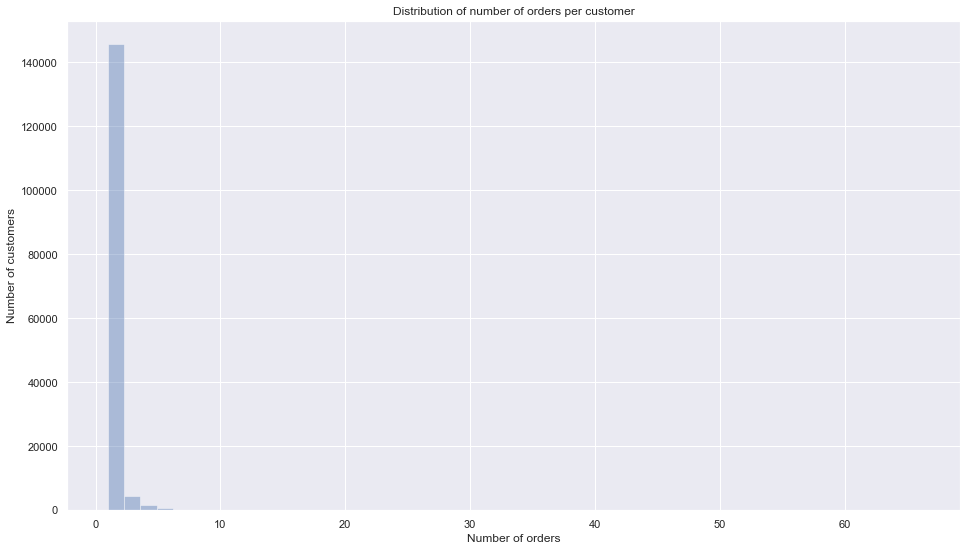

In [563]:
# distribution of number of times a unique customer ordered
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='Number of orders', 
       ylabel='Number of customers');

Since majority customers have only single purchases, hence a low repurchase rate is expected.


The dataset we are using does not contain the customer sign-up date. That is why we assume that the cohort they belong to is based on the first purchase date (first_order_date)

In [564]:
df_orders_merged['first_date_order'] = pd.to_datetime(df_orders_merged['first_date_order'])
df_orders_merged['created_at'] = pd.to_datetime(df_orders_merged['created_at'])

In [565]:
# Extracting order month as a seperate col
df_orders_merged['order_month'] = df_orders_merged['created_at'].dt.to_period('M')

# Grouping based on customer_id and assigning the month and year of the first_date_order as the cohort
df_orders_merged['cohort'] = df_orders_merged.groupby('customer_id')['first_date_order'].transform('min').dt.to_period('M')

/Users/lanaguest/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1088: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


Aggregation is done based on `cohort` and `order_month` and the corresponding unique customers are counted. Further the `period` is calculated which is the difference between the first order month and month of the order creation

In [566]:
df_cohort = df_orders_merged.groupby(['cohort', 'order_month']).agg(n_customers=('customer_id', 'nunique')).reset_index(drop=False)
df_cohort['period'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))


In [567]:
df_cohort

,cohort,order_month,n_customers,period
0,2019-12,2019-12,60,0
1,2019-12,2020-01,2,1
2,2019-12,2020-02,2,2
3,2019-12,2020-03,3,3
4,2019-12,2020-05,2,5
...,...,...,...,...
126,2021-01,2021-02,912,1
127,2021-01,2021-03,397,2
128,2021-02,2021-02,13500,0
129,2021-02,2021-03,279,1


In [568]:
# calculate number of customers belonging to a certain cohort who placed orders at every period after the first order
cohort_pivot = df_cohort.pivot_table(index = 'cohort',columns = 'period',values = 'n_customers')

In [570]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

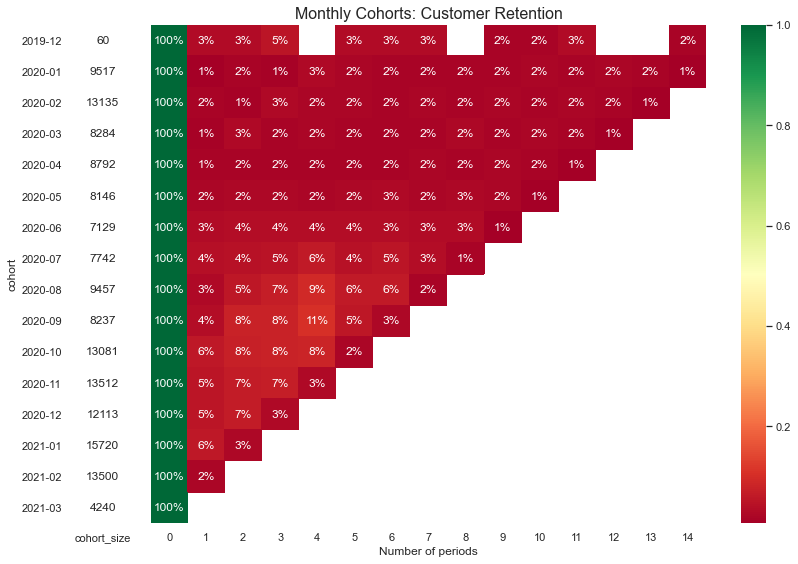

In [571]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: Customer Retention', fontsize=16)
    ax[1].set(xlabel='Number of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

### Trends:
1. As expected, the repurchase after the 1st order is extremley low for all cohorts since only 2% - 3% of customers on average return to make another order.
2. The retention rate seems to be improving gradually for newly added customers.
3. Cohort for the months of Aug, Sept and Oct seem to be performing better than others. 

# 2b.) High level Business Development

In [574]:
# Removing cancelled orders since they do not add to revenue
df_orders_merged = df_orders_merged[df_orders_merged['cancelled_at'].isna()]

# Imputing NaNs in product price columns with average price of all products
df_orders_merged['product_price'].fillna(df_orders_merged['product_price'].mean(), inplace = True)

# calculating revenue by subtracting the corresponding discount
df_orders_merged['revenue'] = df_orders_merged['product_price'] - (df_orders_merged['product_price']*df_orders_merged['total_discounts']/100)

# grouping merged table on order_number, customer_id and summing the revenue
revenue = df_orders_merged.groupby(['order_number', 'customer_id', 'billing_address_country', 'order_month', 'product_category', 'cohort', 'product_items'], as_index = False)['revenue'].sum()

### Revenue analysis

Text(0, 0.5, 'Total Revenue')

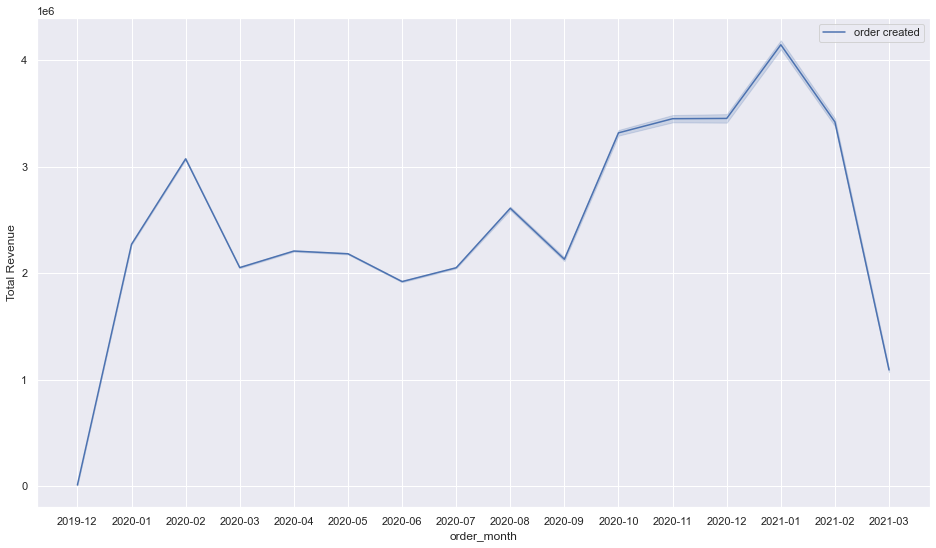

In [575]:
# converting datatype of order_month and plotting
revenue['order_month'] = revenue['order_month'].astype(str)
sns.set(rc={'figure.figsize':(16,9)})
sns.lineplot(data = revenue, x = 'order_month', y = 'revenue', label = 'order created', estimator = 'sum')
revenue['cohort'] = revenue['cohort'].astype(str)
plt.ylabel('Total Revenue')

### Observations:
1. Peaks in Jan and Feb and again between Oct and Dec.
2. Reasons could be New year resolutions, special offers, events like black friday and festive seasons

## Product analysis

<AxesSubplot:xlabel='product_category', ylabel='revenue'>

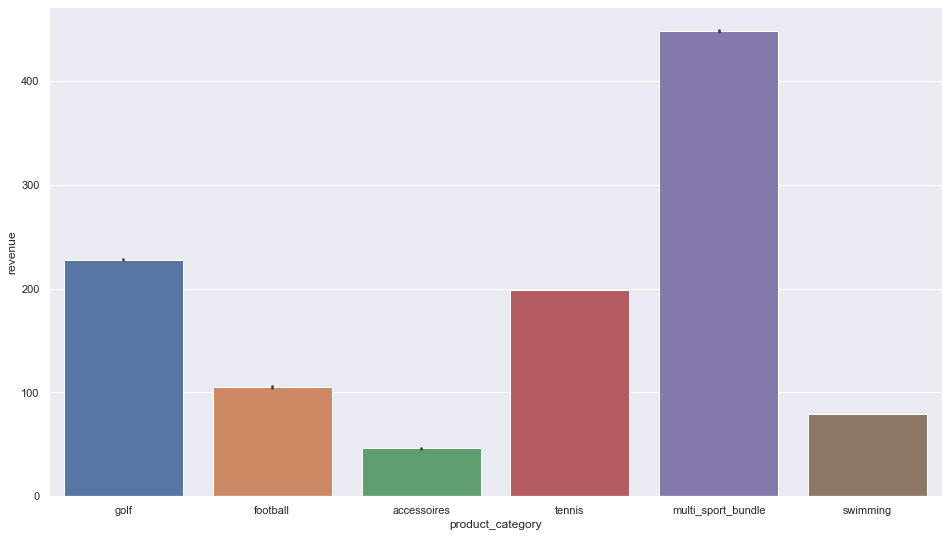

In [531]:
sns.barplot(data = revenue, x = 'product_category', y = 'revenue')

### Observations
`Multi-sport-bundle` category has been generating the highest average revenue.

## Location based analysis

<AxesSubplot:xlabel='order_month', ylabel='revenue'>

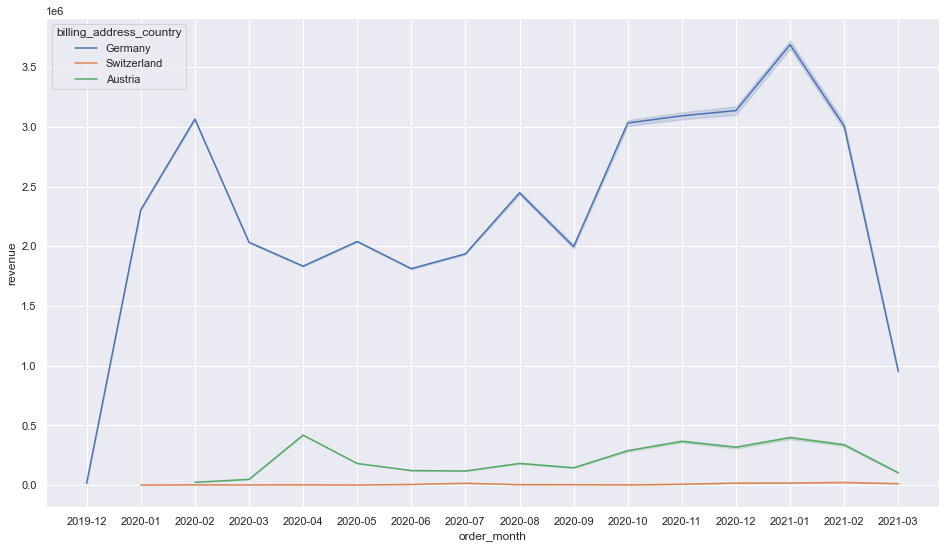

In [467]:
# Revenue growth accross time period for top 3 revenue generating countries
top_rev = revenue.groupby(['billing_address_country'], as_index = False)['revenue'].sum().sort_values('revenue', ascending = False)
revenue_top_countries = revenue[(revenue.billing_address_country == 'Germany') | (revenue.billing_address_country == 'Austria') | (revenue.billing_address_country == 'Switzerland')]
sns.lineplot(data = revenue_top_countries, x = 'order_month', y = 'revenue', hue = 'billing_address_country', estimator = 'sum')


### Observation:
Graph shows the revenue variation accross times. For. eg. The revenue growth in germany for the month of Jan in approx 54% similary it can be calculated for other countries

## Discount Analysis

<AxesSubplot:>

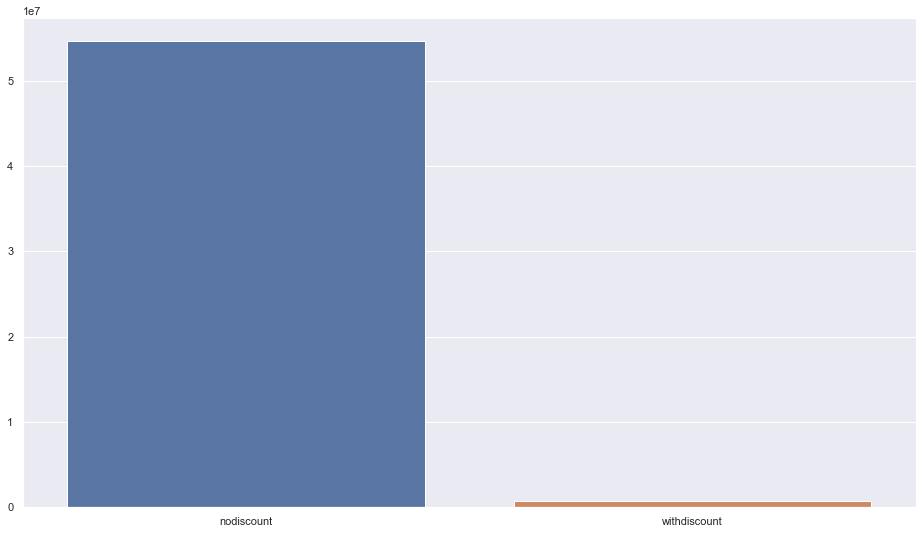

In [576]:
# Filtering dataset for purchases with and without discounts
nodiscount = df_orders_merged[df_orders_merged.total_discounts==0]
withdiscount = df_orders_merged[df_orders_merged.total_discounts>0]
sns.barplot(x=['nodiscount', 'withdiscount'], y = [nodiscount.revenue.sum(), withdiscount.revenue.sum()])

In [577]:
# Adding a new categorical column representing the discount status
df_orders_merged['Ifdiscounted'] = df_orders_merged.apply(lambda x: 'Yes' if x['total_discounts'] >0 else 'No',axis=1)

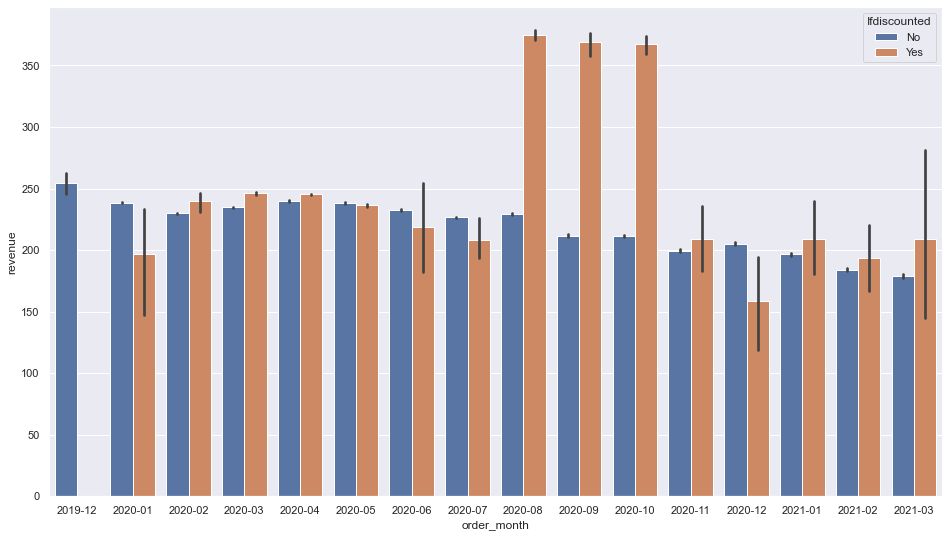

In [578]:
# Plotting average revenue with and without discount
ax = sns.barplot(x="order_month", y="revenue", hue="Ifdiscounted", data=df_orders_merged)

### Observations:
1. From 1st plot, it seems that revenue genrated from discounted sales was very low. There could be potential to increase this revenue through better marketing and special offers.
2. From 2nd plot, average revenue from discounted sales was particularly higher in the months of Aug, Dept and Oct. Hence it seems that the discounts/offers in this timeframe have worked. It can be further investigated to see if it can help increase revenues for the rest of the timeframe as well.